In [52]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"../data/02_intermediate/clean_dataset.csv", encoding="utf-8")

In [30]:
df.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,price,fuel_type,fuel_encoded,generation_name_encoded
0,opel,combo,d-2011,2015,139568,1248,Diesel,Janki,35900,Diesel,1,9
1,opel,combo,d-2011,2018,31991,1499,Diesel,Katowice,78501,Diesel,1,9
2,opel,combo,d-2011,2015,278437,1598,Diesel,Brzeg,27000,Diesel,1,9
3,opel,combo,d-2011,2016,47600,1248,Diesel,Korfantów,30800,Diesel,1,9
4,opel,combo,d-2011,2017,121203,1598,Diesel,Warszawa,51900,Diesel,1,9


In [31]:
df.shape

(85439, 12)

In [32]:
df.isna().sum()

mark                       0
model                      0
generation_name            0
year                       0
mileage                    0
vol_engine                 0
fuel                       0
city                       0
price                      0
fuel_type                  0
fuel_encoded               0
generation_name_encoded    0
dtype: int64

In [33]:
df.describe()

,year,mileage,vol_engine,price,fuel_encoded,generation_name_encoded
count,85439.000000,85439.000000,85439.000000,85439.000000,85439.000000,85439.000000
mean,2012.832758,145128.356125,1814.123796,56614.833249,0.454839,8.733225
std,4.588744,72546.896797,585.785721,48942.050651,0.497959,1.875301
min,1990.000000,2000.000000,0.000000,10000.000000,0.000000,0.000000
25%,2009.000000,88000.000000,1496.000000,23500.000000,0.000000,9.000000
50%,2013.000000,150000.000000,1781.000000,40800.000000,0.000000,9.000000
75%,2017.000000,199000.000000,1995.000000,70000.000000,1.000000,10.000000
max,2022.000000,300000.000000,6592.000000,300000.000000,1.000000,11.000000


In [34]:
df['mark'].value_counts().head(10)

generation_name
unknown          20657
j-2009-2015       1249
iii-2013          1160
mk3-2010          1066
a-2008-2017       1050
e90-2005-2012      996
b8-2007-2015       941
vii-2012           937
8p-2003-2012       934
b8-2014            926
Name: count, dtype: int64

In [42]:
df['fuel_type'].value_counts(normalize=True)

fuel_type
Gasoline    0.545161
Diesel      0.454839
Name: proportion, dtype: float64

In [43]:
df['generation_name'].value_counts().head(10)

generation_name
unknown          20657
j-2009-2015       1249
iii-2013          1160
mk3-2010          1066
a-2008-2017       1050
e90-2005-2012      996
b8-2007-2015       941
vii-2012           937
8p-2003-2012       934
b8-2014            926
Name: count, dtype: int64

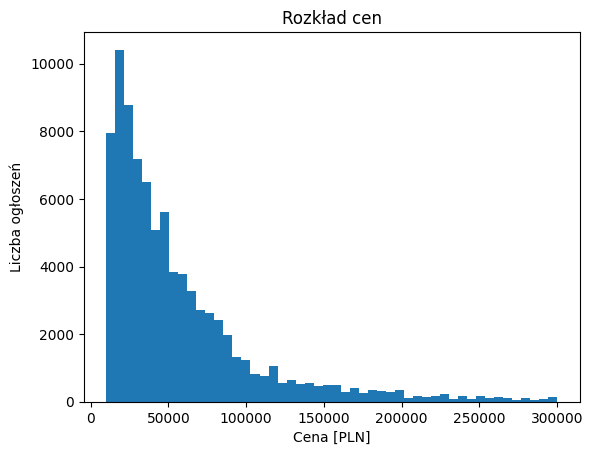

In [35]:
#histogram dla kolumn: price, mileage, log1p, wiek auta
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["price"], bins=50)
plt.title("Rozkład cen")
plt.xlabel("Cena [PLN]")
plt.ylabel("Liczba ogłoszeń")
plt.show()

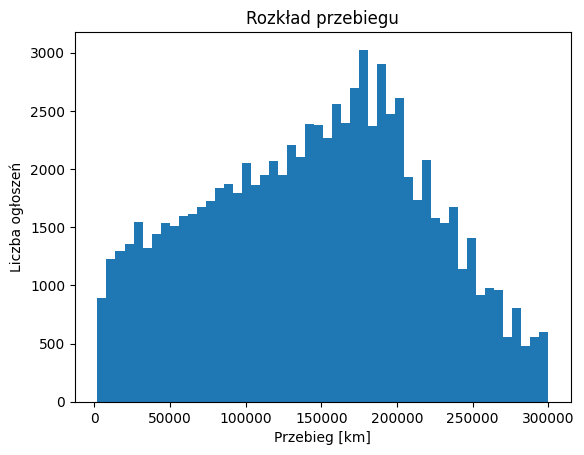

In [48]:
#histogram dla rozkładu przebiegu względem liczby ogłoszeń
plt.figure()
plt.hist(df["mileage"], bins=50)
plt.title("Rozkład przebiegu")
plt.xlabel("Przebieg [km]")
plt.ylabel("Liczba ogłoszeń")
plt.show()

In [53]:
df["age"] = 2025 - df["year"]
df["log_mileage"] = np.log1p(df["mileage"])

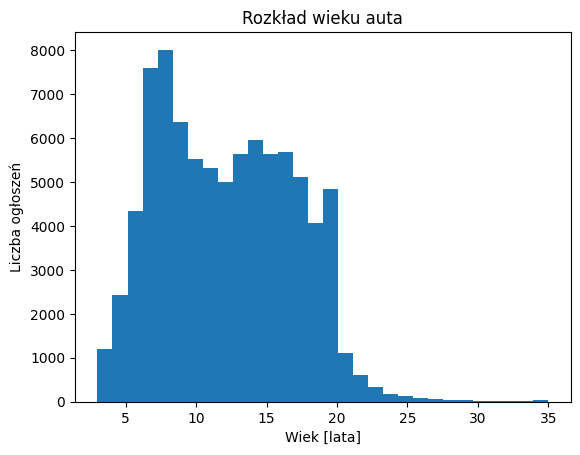

In [54]:
plt.figure()
plt.hist(df["age"], bins=30)
plt.title("Rozkład wieku auta")
plt.xlabel("Wiek [lata]")
plt.ylabel("Liczba ogłoszeń")
plt.show()

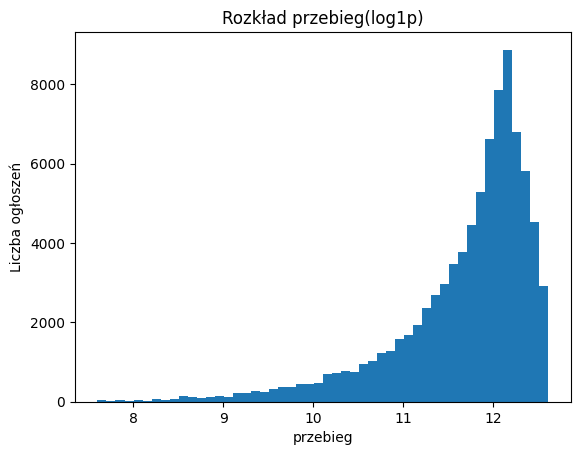

In [57]:
plt.figure()
plt.hist(df["log_mileage"], bins=50)
plt.title("Rozkład przebieg(log1p)")
plt.xlabel("przebieg")
plt.ylabel("Liczba ogłoszeń")
plt.show()

<Figure size 640x480 with 0 Axes>

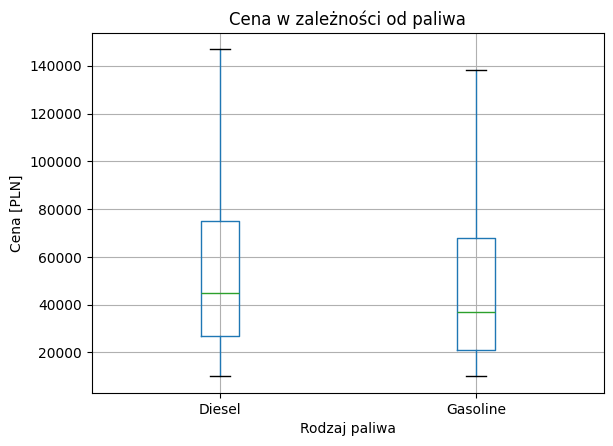

In [36]:
#boxplot: cena vs paliwo
plt.figure()
df.boxplot(column="price", by="fuel_type", showfliers=False)
plt.title("Cena w zależności od paliwa")
plt.suptitle("") 
plt.xlabel("Rodzaj paliwa")
plt.ylabel("Cena [PLN]")
plt.show()

<Figure size 640x480 with 0 Axes>

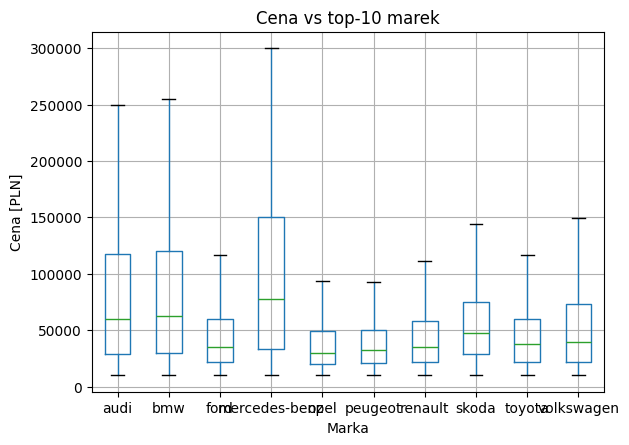

In [59]:
#boxplot: cena vs marka
top10_marks = df["mark"].value_counts().head(10).index.tolist()
plt.figure()
df[df["mark"].isin(top10_marks)].boxplot(column="price", by="mark", showfliers=False)
plt.title("Cena vs top-10 marek")
plt.suptitle("")
plt.xlabel("Marka")
plt.ylabel("Cena [PLN]")
plt.show()

<Figure size 1000x500 with 0 Axes>

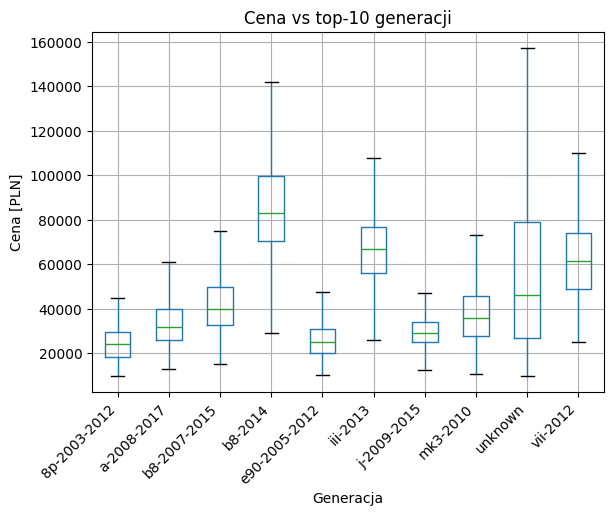

In [60]:
#boxplot: cena vs generacja
top10_gen = df["generation_name"].value_counts().head(10).index.tolist()
plt.figure(figsize=(10,5))
df[df["generation_name"].isin(top10_gen)].boxplot(column="price", by="generation_name", showfliers=False)
plt.title("Cena vs top-10 generacji")
plt.suptitle("")
plt.xlabel("Generacja")
plt.ylabel("Cena [PLN]")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 640x480 with 0 Axes>

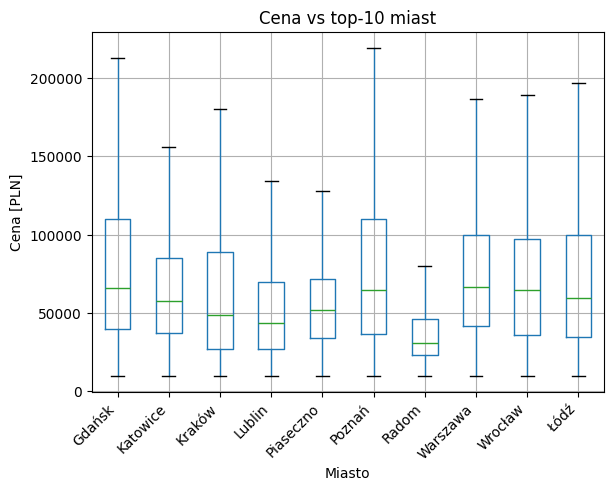

In [66]:
#boxplot: cena vs miasto
top10_cities = df["city"].value_counts().head(10).index.tolist()

plt.figure()
df[df["city"].isin(top10_cities)].boxplot(column="price", by="city", showfliers=False)
plt.title("Cena vs top-10 miast")
plt.suptitle("")          
plt.xlabel("Miasto")
plt.ylabel("Cena [PLN]")
plt.xticks(rotation=45, ha="right")
plt.show()

In [37]:
corr = df[["price","mileage","fuel_encoded","generation_name_encoded","year"]].corr()

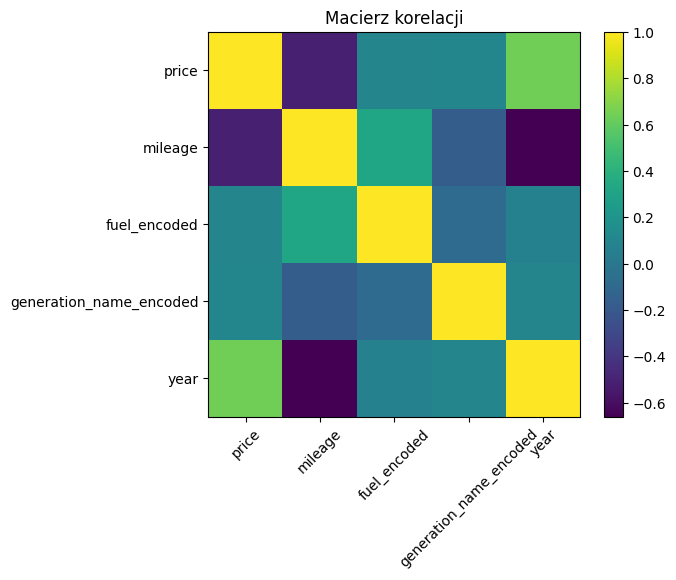

In [38]:
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Macierz korelacji")
plt.show()

In [65]:
#najwyższa średnia cen według modelu
df.groupby("generation_name")["price"].mean().sort_values(ascending=False).head(10)

generation_name
d5-2017             284675.000000
w167-2019           276249.833333
g05-2018            273970.000000
c8-2018-a7          267627.300000
c257-2018           260927.812500
iii-2018-touareg    256454.500000
w206-2021           248740.666667
g02-2018            237954.758621
c8-2018             235522.209877
w463-1992           230299.200000
Name: price, dtype: float64

In [47]:
#najwyższa średnia cen według marki
df.groupby("mark")["price"].mean().sort_values(ascending=False).head(10)

mark
mercedes-benz    99388.011518
bmw              83396.639388
audi             83372.779692
volvo            83248.940552
mazda            55726.474068
skoda            55670.728102
mini             53545.586118
volkswagen       53173.212003
kia              50780.367457
hyundai          47690.045181
Name: price, dtype: float64

In [45]:
#najwyższa średnia cen według typu paliwa
df.groupby("fuel_type")["price"].mean()

fuel_type
Diesel      61816.896220
Gasoline    52274.643265
Name: price, dtype: float64

In [40]:
df["mark"].value_counts(normalize=True).head(15)

mark
audi             0.097169
opel             0.093646
bmw              0.091820
volkswagen       0.090099
ford             0.088800
renault          0.058615
mercedes-benz    0.056906
skoda            0.051311
peugeot          0.044757
toyota           0.041609
hyundai          0.038858
volvo            0.033076
kia              0.032585
nissan           0.030103
mazda            0.027306
Name: proportion, dtype: float64

In [70]:
#Feature Engineering
X = pd.read_csv(r"../data/02_intermediate/features.csv")
y = pd.read_csv(r"../data/02_intermediate/price_target.csv")

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Price column in features?", "price" in X.columns)
print("Any NaNs in X?", X.isna().sum().any())
print("Any NaNs in y?", y.isna().sum().any())

Features shape: (85439, 70)
Target shape: (85439, 1)
Price column in features? False
Any NaNs in X? False
Any NaNs in y? False


In [69]:
display(X.head())
display(y.head())

,vol_engine,fuel_encoded,age,mileage_per_year,log_mileage,mark_audi,mark_bmw,mark_citroen,mark_fiat,mark_ford,...,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,gen_10,gen_11
0,-0.966441,1,-0.472298,0.391867,0.216414,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.537954,1,-1.126076,-1.380462,-1.696156,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.368949,1,-0.472298,3.013903,1.113105,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.966441,1,-0.690224,-1.244753,-1.180232,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.368949,1,-0.908150,0.617231,0.033237,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


,price
0,35900
1,78501
2,27000
3,30800
4,51900


In [77]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

In [76]:
X = pd.read_csv("../data/02_intermediate/features.csv", encoding="utf-8")
y = pd.read_csv("../data/02_intermediate/price_target.csv", encoding="utf-8")["price"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [79]:
predictor = TabularPredictor.load("../data/06_models/car_price_predictor")

test_data = X_test.copy()
test_data["price"] = y_test.values
leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard.head(10))

                 model    score_test     score_val              eval_metric  \
0             CatBoost -12636.112328 -12317.778977  root_mean_squared_error   
1  WeightedEnsemble_L2 -12747.797547 -12079.475155  root_mean_squared_error   
2              XGBoost -13161.889832 -12904.500400  root_mean_squared_error   
3             LightGBM -13230.850794 -12214.910797  root_mean_squared_error   

   pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  \
0        0.386414       0.007003   87.671179                 0.386414   
1        2.685393       0.155002  100.662232                 0.009000   
2        0.520257       0.037000    5.250288                 0.520257   
3        2.289978       0.148000   12.978054                 2.289978   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.007003          87.671179            1       True   
1                0.000000           0.013000            2       True   
2                0.037

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE: 7009.269299253542
RMSE: 12747.797546586142
R2: 0.931117832660675


C:\Users\panpi\PycharmProjects\ASI\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


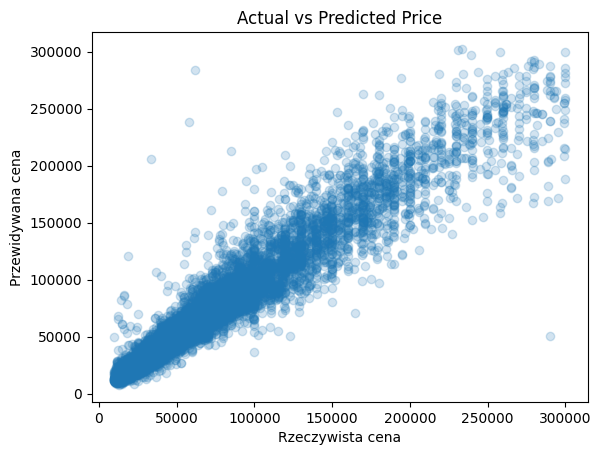

In [81]:
y_pred = predictor.predict(X_test)

print("MAE:",  mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2:",   r2_score(y_test, y_pred))

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Rzeczywista cena")
plt.ylabel("Przewidywana cena")
plt.title("Actual vs Predicted Price")
plt.show()

In [84]:
test_df = X_test.copy()
test_df["price"] = y_test.values

predictor = TabularPredictor.load("../data/06_models/car_price_predictor")

fi = predictor.feature_importance(test_df)
print(fi.head(20))

                      importance      stddev       p_value  n      p99_high  \
age                 31022.896306  564.058661  1.310864e-08  5  32184.300885   
model_te            16791.125150  389.259469  3.463440e-08  5  17592.615777   
vol_engine          12330.620919  429.415012  1.762172e-07  5  13214.792364   
log_mileage          2952.652099  234.928344  4.768885e-06  5   3436.372806   
mileage_per_year     1885.584804  271.415046  5.012209e-05  5   2444.432135   
gen_9                1826.709684  110.727456  1.612129e-06  5   2054.699046   
mark_mercedes-benz   1095.902636  157.196745  4.943634e-05  5   1419.572908   
mark_audi             905.450150   93.971149  1.372428e-05  5   1098.938045   
fuel_encoded          770.395795  118.089540  6.422244e-05  5   1013.543790   
mark_volkswagen       447.757139  118.347741  5.348632e-04  5    691.436774   
gen_10                254.455116   57.979472  3.022400e-04  5    373.835650   
mark_ford             231.182365   39.200638  9.5513

In [87]:
# final evaluation
metrics_final = pd.read_csv("../data/07_model_output/metrics_final.csv", encoding="utf-8")
print("Final metrics:")
print(metrics_final, "\n")

Final metrics:
  metric         value
0    MAE   7002.973845
1   RMSE  12530.856446
2     R2      0.933442 


In [90]:
X = pd.read_csv("../data/02_intermediate/features.csv", encoding="utf-8")
y = pd.read_csv("../data/02_intermediate/price_target.csv", encoding="utf-8")["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [92]:
predictor = TabularPredictor.load("../data/07_model_output/car_price_predictor_final")

In [93]:
test_df = X_test.copy()
test_df["price"] = y_test.values
leaderboard = predictor.leaderboard(test_df, silent=True)
print("Final Leaderboard (top 10):")
print(leaderboard.head(10), "\n")

Final Leaderboard (top 10):
                      model    score_test     score_val  \
0           CatBoost_BAG_L1 -12521.723288 -12470.796125   
1       WeightedEnsemble_L3 -12530.856446 -12349.356913   
2       WeightedEnsemble_L2 -12539.728053 -12356.568876   
3           LightGBM_BAG_L2 -12556.645276 -12452.410781   
4            XGBoost_BAG_L2 -12587.302400 -12437.874952   
5           CatBoost_BAG_L2 -12588.548136 -12449.123053   
6  WeightedEnsemble_L2_FULL -12596.316820           NaN   
7  WeightedEnsemble_L3_FULL -12600.118348           NaN   
8      CatBoost_BAG_L1_FULL -12638.606850           NaN   
9      LightGBM_BAG_L2_FULL -12648.537644           NaN   

               eval_metric  pred_time_test  pred_time_val    fit_time  \
0  root_mean_squared_error        0.324538       0.119467  341.430484   
1  root_mean_squared_error        6.528251       2.332718  402.798563   
2  root_mean_squared_error        5.075818       1.813308  382.323730   
3  root_mean_squared_error    

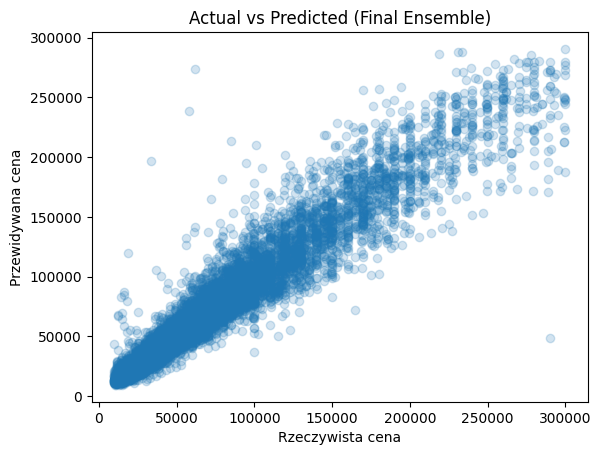

In [94]:
y_pred = predictor.predict(X_test)
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Rzeczywista cena")
plt.ylabel("Przewidywana cena")
plt.title("Actual vs Predicted (Final Ensemble)")
plt.show()

In [ ]:
fi = predictor.feature_importance(test_df)
print("Final Feature Importance (top 20):")
print(fi.head(20))